# Statistics

_____

### Hypothesis Testing 

- Permutation Test
- CLT
- One-Sample TTest
- Two-Sample TTest

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

### Permutation Test

In [2]:
class Permutation_Test(object):
    
    """ Computing Permutation Test -- i.e. Exact Randomization Test"""
    
    def __init__(self,fname):
        
        self.data = pd.read_csv('data/{}.csv'.format(fname))
        self.trials = 1000
        
        #Get Global and Sampled Means
        self.global_mean,self.sample_means = self.get_permutations()
    
    def get_permutations(self):
        
        print('--- Permutation Test ---')

        #Get Observed Mean
        global_mean = self.data.groupby(['Treatment'])['Score'].mean().diff().iloc[1]

        means = []
        for i in range(0,self.trials):
            means.append(self.data.apply(np.random.permutation).groupby(['Treatment'])['Score']\
                         .mean().diff().iloc[1])

        #Get P-Value
        m = pd.DataFrame(means,columns=['Diff_Means'])
        count = sum(np.where((m['Diff_Means'] > global_mean) | (m['Diff_Means'] < -global_mean),1,0))

        print('Probability of observing a distribution more extreme than {} is {}/{}!'\
              .format(round(global_mean,3),count,self.trials))

        if count/self.trials < 0.05:
            print("""Strong evidence to suggest mu1 and mu1 are not drawn from the same distribution\
               Conclusion: Reject null hypothesis that mu1 == mu2""")
        else:
            print('Fail to reject the null hypothesis and conclude that there \
                 is a significant difference')
            
        return(global_mean,m)
    
    def histogram(self):
        
        "Return Histogram of Permutations"
        
        fig = plt.figure(figsize=(8,4))
        ax = fig.add_subplot(111)
        ax.vlines(x=self.global_mean,ymin=0,ymax=300,lw=2.0,color='b')
        ax.vlines(x=-self.global_mean,ymin=0,ymax=300,lw=2.0,color='b')
        self.sample_means.hist(ax=ax,alpha=0.70)
        ax.set_ylabel('Count',fontsize=14)
        ax.set_xlabel('Sampled Means',fontsize=14)
        plt.title('Permutations Test',fontsize=18,y=1.02)
        plt.show()

--- Permutation Test ---
Probability of observing a distribution more extreme than 4.144 is 7/1000!
Strong evidence to suggest mu1 and mu1 are not drawn from the same distribution               Conclusion: Reject null hypothesis that mu1 == mu2


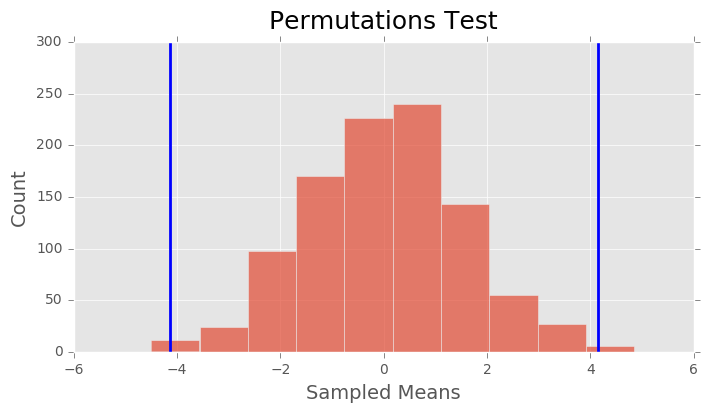

In [3]:
if __name__ == '__main__':
    file = 'case0101'
    results = Permutation_Test(file)
    results.histogram()

### Central Limit Theorem

In [31]:
class central_limit_theorem(object):
    
    def __init__(self,data_size,sample_size,n_iter):
    
        #Synthetic Data
        self.x = np.random.randint(0,100,data_size)
        
        #sample size
        self.samp = sample_size
        
        #Number of times to resample
        self.n_iter = n_iter
    
    def random_sample_means(self,sample_size):
        
        print('--- Central Limit Theorem ---')
        
        #Random Sample n
        means = [np.random.choice(self.x,self.samp).mean() for i in range(0,self.n_iter)]
        print('Number of subsampled means: {}'.format(len(means)))
        plt.figure(figsize=(8,4))
        plt.title('Central Limit Theorem')
        plt.hist(means,color='b',alpha=0.6,bins=10)
        plt.xlabel('Mean')
        plt.ylabel('Count')

--- Central Limit Theorem ---
Number of subsampled means: 200


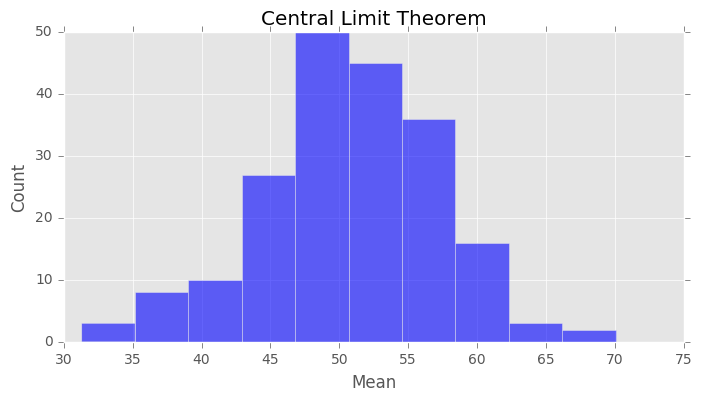

In [32]:
test = central_limit_theorem(1000,20,200)
test.random_sample_means(200)

### T-Test:


- One Sample T-Statistic = $\frac{\bar{x}-\mu}{\frac{s}{\sqrt{n}}}$


- One Sample Condifence Interval = $\mu \pm  t_{(n-1,\alpha)}\frac{s}{\sqrt{n}}$


- Two Sample T-Statistic = $\frac{\bar{x_{1}}-\bar{x_{2}}}{\sqrt{\frac{\sigma_{1}^{2}}{n_{1}} + \frac{\sigma_{2}^{2}}{n_{2}}}}$


- Two Sample Standard Error = ${s_{p}}\sqrt{\frac{1}{n_{1}} + \frac{1}{n_{2}}}$


- Pooled Estimate of Standard Deviation: $s_{p} = \sqrt{\frac{(n_{1}-1)s_{1}^{2} + (n_{1}-1)s_{1}^{2}}{(n_{1} + n_{2} - 2)}}$ ; where 's' equals sample standard deviation


- Two Sample T-Test Confidence Interval: $(\bar{Y_{2}} - \bar{Y_{1})} \pm t_{df,(1-\frac{\alpha}{2}})SE$

**Assumptions:**

- Samples are drawn from a Gaussian Distribution
- If a two-sample test, both populations are assumed to have the same standard deviation (i.e. Pooled)
- Obervations in the sample are independent of one another

**Rules of Thumb in Evaluating Assumptions:**

- If sample sizes are the same and sufficently large, the t-tools are valid since they are robust to the violation of normality.
- If the two populations have the same standard deviation then the t-tests are valid given sufficient sample sizes.
- IF the standard deviations are different and the sample sizes are different, then the t-tools are not valid and another procedure should be used.

**Transformations**

- If assumptions are not met, look at transforming the data such as taking the logarithmic transformation. 
- Note that for Randomized experiments, the interpretation is as follows:
- "It is estimated that the median for population X is: $$exp(mean(log(x)) - means(log(y))$$.

### One Sample T-Test

In [2]:
from scipy.stats import ttest_1samp
class One_Sample_TTest(object):
    
    #Set Static Elements:
    None
    
    def __init__(self,input,mu):
        
        #Set Object Elements
        self.data = input
        self.test_mean = mu
        self.significance = 0.05
        
    def test(self):
        
        print('--- Two Sample TTest ---')
        ttest = ttest_1samp(self.data,self.test_mean)
        
        print('Test Statistic: {0:.4f}'.format(ttest[0]))
        print('P-Value: {0:.4f}'.format(ttest[1]))
        print('Level of Significance: {}'.format(self.significance))
        
        print('\n--- Conclusion ---')
        if ttest[1] < self.significance:
            print('Reject Null Hypothesis')
        else:
            print('Fail to Reject Null Hypothesis')      

In [34]:
if __name__ == '__main__':
    
    data = [1.7, 1.6, 1.5, 2.0, 2.3, 1.6, 1.6, 1.8, 1.5, 1.7, 2.2, 1.4, 1.6, 1.6, 1.6]
    one_samp = One_Sample_TTest(data,1.8)
    one_samp.test()

--- Two Sample TTest ---
Test Statistic: -1.2972
P-Value: 0.2155
Level of Significance: 0.05

--- Conclusion ---
Fail to Reject Null Hypothesis


### Two-Sample T-Test

In [16]:
from scipy.stats import ttest_ind
from sklearn import datasets
from scipy.stats import pearsonr
import scipy.stats as stats
import seaborn as sns
import scipy

class Two_Sample_Test(object):
    
    def __init__(self,data):
        
        #Initialize Constructor
        self.data = data      
        self.data.columns = ['Data','Labels']
        self.significance = 0.05 #alpha
        self.tails = 1 #Two or One Sided Test
        self.trials = 1000 #Number of Iterations
        
        #Get Two-Sample Populations
        gp = list(self.data.groupby(['Labels'])['Data'])
        
        self.popA = gp[0][1]
        self.popB = gp[1][1]
        
        #Degrees of Freedom
        self.df = len(self.popA) + len(self.popB) -2
        
        
    def get_boxplots(self):
        
        """ Exploratory Analysis --- Boxplot for Each Population"""
        
        fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(8,4))
        fig.subplots_adjust(wspace=.4, hspace=.4)
        ax[0].boxplot(self.popA)
        ax[1].boxplot(self.popB.reset_index(drop=True))

        ax[0].set_title('Sample Population A')
        ax[1].set_title('Sample Population B')
        
    def get_histogram(self):
        
        """ Exploratory Analysis --- Histogram for Each Population"""
            
        fig, ax = plt.subplots(nrows=2, ncols=1)
        fig.subplots_adjust(wspace=.4, hspace=.4)
        
        #Develop Histograms (i.e. density plots)
        self.popA.plot(kind='density',color='g',alpha=0.80,ax=ax[0],figsize=(10,8))
        self.popB.plot(kind='density',color='b',alpha=.80,ax=ax[1],figsize=(10,8))
        
        ax[0].set_title('Sample Population A')
        ax[1].set_title('Sample Population B')
        
    
    def test_equal_variance(self):
        
        """ Perform Levene's Test to Check Equality of Variance """
        
        #Note: F-Test of Variance is NOT robust to non-gaussian distributed samples -- examine visualizations
        
        print('-- Levene Test : Equality of Variance --- ')
        
        #One-Way ANOVA F-Test
        stat,pval = scipy.stats.levene(self.popA,self.popB)
        print('Statistic: {}'.format(stat))
        print('P-Value: {}'.format(pval))
        
        if pval < 0.05:
            print('Reject Null Hypothesis')
        else:
            print('Fail to Reject Null Hypothesis')   
        
    
    def do_permutations(self):
        
        print('\n--- Permutation Test ---')

        #Get Observed Mean
        global_mean = np.abs(self.data.groupby(['Labels'])['Data'].mean().diff().iloc[1])

        means = []
        for i in range(0,self.trials):
            means.append(self.data.apply(np.random.permutation).groupby(['Labels'])['Data']\
                         .mean().diff().iloc[1])

        #Get P-Value
        m = pd.DataFrame(means,columns=['Diff_Means'])
        
        count = sum(np.where((m['Diff_Means'] > global_mean) | (m['Diff_Means'] < -global_mean),1,0))

        
        print('Observed Mean Difference: ',global_mean)
        print('Probability of observing a distribution more extreme than {} is {}/{}!'\
              .format(round(global_mean,3),count,self.trials))

        if count/self.trials < 0.05:
            print('Strong evidence to suggest mu1 and mu1 are not drawn from the same distribution')
            
            print('Reject null hypothesis that mu1 == mu2')
        
        else:
            print('Fail to reject the null hypothesis and conclude that there is a significant difference')

        #Setup Plot
        fig = plt.figure(figsize=(8,4))
        ax = fig.add_subplot(111)

        #Simulation
        m.hist(ax=ax,bins=50,color='purple',edgecolor='white',label='Simulation')

        plt.title('Permutation Test',fontsize=18,y=1.02)
        plt.legend(frameon=False)
    
    def two_sample_ttest(self):
        
        """ Two-Sample T-Test ** Assuming Independence """
        
        print('--- Two-Sample Test ---')

        #Critical Value
        tcrit = abs(scipy.stats.t.ppf(self.significance/self.tails, self.df))
        
        #Test Statistic and PValue
        t_statistic,pval = ttest_ind(self.popA,self.popB,equal_var=True)
        
        print('Critical Test Statistic: ',tcrit)
        print('Test Statistic: ',t_statistic)
        print('PValue: ',pval)
        
        if pval < self.significance:
            print('Reject Null Hypothesis')
        
        else:
            print('Fail to Reject Null Hypothesis')
            
            
        """ Confidence Interval"""
        #Difference in observed means:
        diff = self.popA.mean() - self.popB.mean()
        
        n1 = len(self.popA)
        n2 = len(self.popB)

        #Pooled Std.Dev
        sp = np.sqrt(((n1-1)*(np.std(self.popA)**2) + (n2-1)*(np.std(self.popB)**2)) / (n1+n2-2))
        
        #Standard Error
        se = sp * np.sqrt((1/n1) + (1/n2))

        #Confidence Interval
        t = scipy.stats.t.ppf(1-self.significance/2, self.df)
        upper_CI,lower_CI = abs(diff) + t*se, abs(diff) - t*se

        print('Standard Error: ',se)
        print('{0:.0f}% Confidence Interval = [{1:.4f} to {2:.4f}]'.format((1-self.significance)*100,
                                                                           lower_CI,upper_CI))
     
        #Setup Plot
        fig = plt.figure(figsize=(8,4))
        ax = fig.add_subplot(111)
        
        #T-Distribution PDF
        tcrit = abs(scipy.stats.t.ppf(self.significance/2, self.df))
        xs = np.linspace(-5,5,1000)
        ax.plot(xs, scipy.stats.t.pdf(xs,self.df), 'k', color='b',label='T-Distribution')
        
        ax.vlines(x=tcrit,ymin=0,ymax=.50,lw=2.0,color='r',linestyle='--',label='T-Critical')
        ax.vlines(x=-tcrit,ymin=0,ymax=.50,lw=2.0,color='r',linestyle='--')
        
        plt.title('Two-Sample T-test',fontsize=18,y=1.02)
        plt.legend(frameon=False)
        
        legend = ax.legend(loc='upper left', shadow=True)
        
    def bootstrap(self,size=500,n_iter=10000):
        
        """ Return Bootstrapped Confidence Interval for Two-Samples"""
        
        print('--- Bootstrap ---')
        
        global_mean = np.abs(self.data.groupby(['Labels'])['Data'].mean().diff().iloc[1])
        
        mu = []
        for i in range(0,n_iter):
            mu.append(self.data.groupby('Labels')['Data'].apply(lambda x: np.mean(np.random.choice(\
                                                        x,size=size,replace=True))).diff().iloc[1])
        
        #Sort Bootstrapped Means
        mu = np.sort(np.abs(mu))
        
        #Confidence Intervals:
        upper_quartile = (1 - (self.significance/2))*100
        lower_quartile = (1- (1 - (self.significance/2)))*100
        
        upper= float(np.percentile(mu,upper_quartile))
        lower = float(np.percentile(mu,lower_quartile))
        
        print('Sample Size: ',size)
        print('Resample Iterations: ',n_iter)
        print('{}% Confidence Interval: [{} to {}]'.format((1-self.significance)*100,lower,upper))
        
        #Setup Plot
        fig = plt.figure(figsize=(8,4))
        ax = fig.add_subplot(111)

        #Bootstrap Distribution of Means
        ax.hist(mu,color='b',alpha=.60,bins=20)
        
        #Confidence Interval
        ax.vlines(x=upper,ymin=0,ymax=1500,lw=1.5,color='k',linestyle='--',label='CI')
        ax.vlines(x=lower,ymin=0,ymax=1500,lw=1.5,color='k',linestyle='--')
        

        ax.vlines(x=global_mean,ymin=0,ymax=.50,lw=2.0,color='r',linestyle='--',label='Observed Mean')
        plt.title('Bootstrap Mean Difference',fontsize=18,y=1.02)
      

In [17]:
data= pd.read_csv('data/case0101.csv')
t = Two_Sample_Test(data)

#### Check Assumptions:

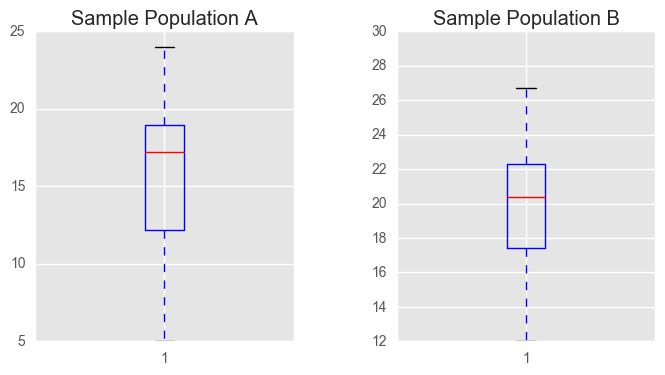

In [18]:
t.get_boxplots()

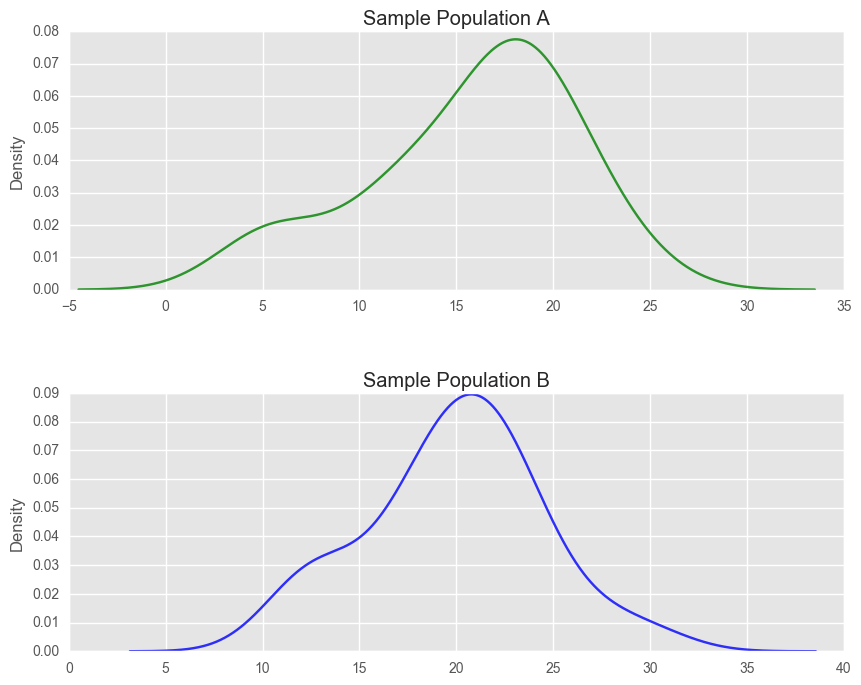

In [19]:
t.get_histogram()

In [20]:
t.test_equal_variance()

-- Levene Test : Equality of Variance --- 
Statistic: 0.35996340373489716
P-Value: 0.5515359991358482
Fail to Reject Null Hypothesis


--- Two-Sample Test ---
Critical Test Statistic:  1.67942739157
Test Statistic:  -2.92587609092
PValue:  0.00536647628271
Reject Null Hypothesis
Standard Error:  1.38582458674
95% Confidence Interval = [1.3530 to 6.9354]


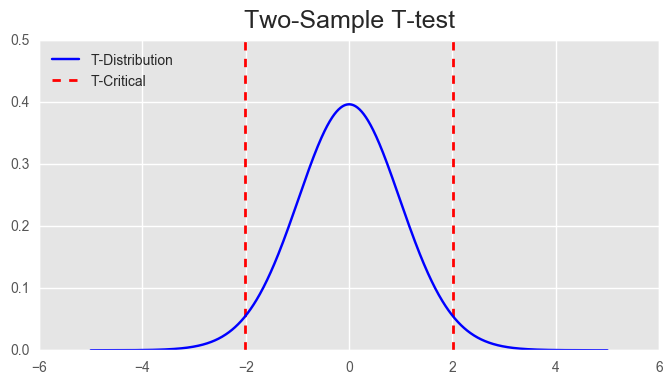

In [21]:
t.two_sample_ttest()


--- Permutation Test ---
Observed Mean Difference:  4.14420289855
Probability of observing a distribution more extreme than 4.144 is 8/1000!
Strong evidence to suggest mu1 and mu1 are not drawn from the same distribution
Reject null hypothesis that mu1 == mu2


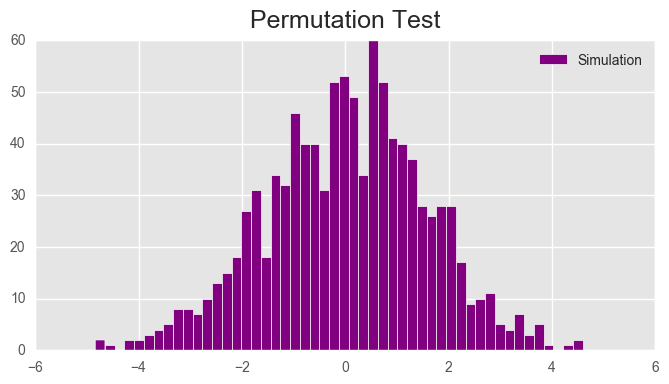

In [22]:
t.do_permutations()

--- Bootstrap ---
Sample Size:  500
Resample Iterations:  10000
95.0% Confidence Interval: [3.5653900000000003 to 4.743204999999995]


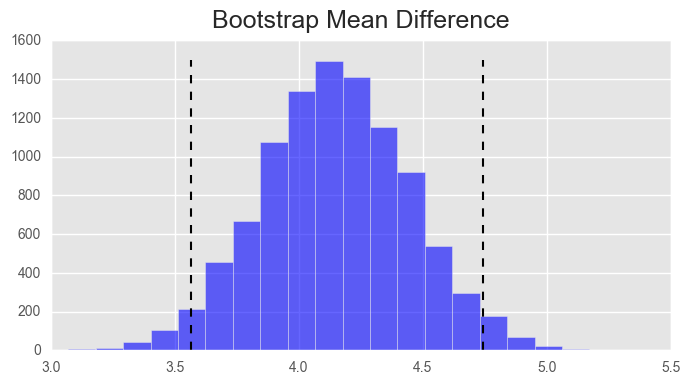

In [23]:
t.bootstrap()